<h1><center>Prediction of power generated by windmill</center></h1>

<center><img src='windmills.jpg'></center>

In this notebook we present you a prediction of power generated by windmill. Dataset we used is from [this](https://www.kaggle.com/datasets/mubashirrahim/wind-power-generation-data-forecasting?fbclid=IwAR0T6vzPk2tEdrWi3-75ipvpJgZDZ3pETaik6PwwSbc2OadeilPo5g9pSdE&select=Location1.csv) kaggle project. Dataset contains meteorological observations and power generated by windmill hourly between years 2017 and 2022. 

In this project we used linear regression as well as SARIMA, AR and Holt-Winters's models to predict generated power. Due to the size of dataset, records were aggregated from hourly to monthly by taking avarage value from every column. After that we used Information Capacity Indices, Graph and Correlation Coefficient Analysis methods to find best variables for our linear model. At the end we used different metrcis to select the best one.

Enjoy! &#x1F600;

## Linear regression

In [28]:
library(tidyverse)
library(lmtest)
library(orcutt)
library(car)
library(Metrics)
library(performance)
library(DescTools)
set.seed(7312)

In [29]:
data <- read.csv("Location1.csv")
data
summary(data)

Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793
2017-01-02 05:00:00,27.6,90,25.2,2.73,5.59,66,80,4.5,0.0778
2017-01-02 06:00:00,26.7,92,24.9,2.10,5.82,65,78,4.7,0.0959
2017-01-02 07:00:00,28.4,91,26.1,3.10,6.24,69,78,4.8,0.1141
2017-01-02 08:00:00,30.2,88,27.0,3.54,6.89,74,81,5.8,0.1322


     Time           temperature_2m   relativehumidity_2m  dewpoint_2m    
 Length:43800       Min.   :-14.40   Min.   : 18.00      Min.   :-17.10  
 Class :character   1st Qu.: 32.10   1st Qu.: 60.00      1st Qu.: 24.30  
 Mode  :character   Median : 47.30   Median : 74.00      Median : 38.10  
                    Mean   : 47.86   Mean   : 72.29      Mean   : 38.57  
                    3rd Qu.: 64.50   3rd Qu.: 86.00      3rd Qu.: 54.70  
                    Max.   : 94.10   Max.   :100.00      Max.   : 76.30  
 windspeed_10m    windspeed_100m   winddirection_10m winddirection_100m
 Min.   : 0.000   Min.   : 0.100   Min.   :  1.0     Min.   :  0.0     
 1st Qu.: 2.410   1st Qu.: 4.380   1st Qu.:132.0     1st Qu.:130.0     
 Median : 3.300   Median : 6.080   Median :225.0     Median :226.0     
 Mean   : 3.591   Mean   : 6.284   Mean   :203.6     Mean   :203.3     
 3rd Qu.: 4.590   3rd Qu.: 7.990   3rd Qu.:277.0     3rd Qu.:278.0     
 Max.   :13.450   Max.   :20.650   Max.   :360.0  

In [30]:
# Aggregating data to monthly by taking avarage value from all days in a month
data$Time <- as.Date(data$Time)
data2 <- data %>%
  mutate(Month = format(Time, "%Y-%m"))

In [31]:
month_mean <- data2 %>%
  group_by(Month) %>%
  summarise(across(c("temperature_2m", "relativehumidity_2m", "dewpoint_2m", "windspeed_10m", "windspeed_100m", "winddirection_10m", "winddirection_100m", "windgusts_10m", "Power"), mean))
month_mean
mean_data = month_mean[2:10]

Month,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2017-01,27.07056,77.80694,20.58875,3.616514,6.485722,216.0611,220.0875,7.596944,0.3765031
2017-02,32.65610,69.38095,23.08780,4.199940,7.345565,225.2485,229.4018,8.878869,0.5065783
2017-03,32.12406,65.00806,20.38777,4.251586,7.167527,206.7003,203.3118,9.200134,0.4812716
2017-04,48.64944,69.36389,37.99875,4.196181,7.239056,178.8639,180.9778,9.289306,0.3757151
2017-05,54.05067,67.09946,42.40121,3.862688,6.563495,181.1707,181.5175,8.578495,0.4497516
2017-06,65.97194,69.48611,54.78125,3.508333,6.071597,208.0597,208.8708,8.085278,0.3622671
2017-07,69.26573,74.76747,60.09731,2.823360,4.892392,205.7473,201.6102,6.451882,0.2913481
2017-08,66.48548,75.62903,57.89758,2.897016,5.099677,208.0538,206.6492,6.425134,0.2608376
2017-09,63.97986,75.79861,55.49375,2.687458,4.919722,189.6861,185.1208,5.852778,0.2900068


Scatter plots to check for any correlations

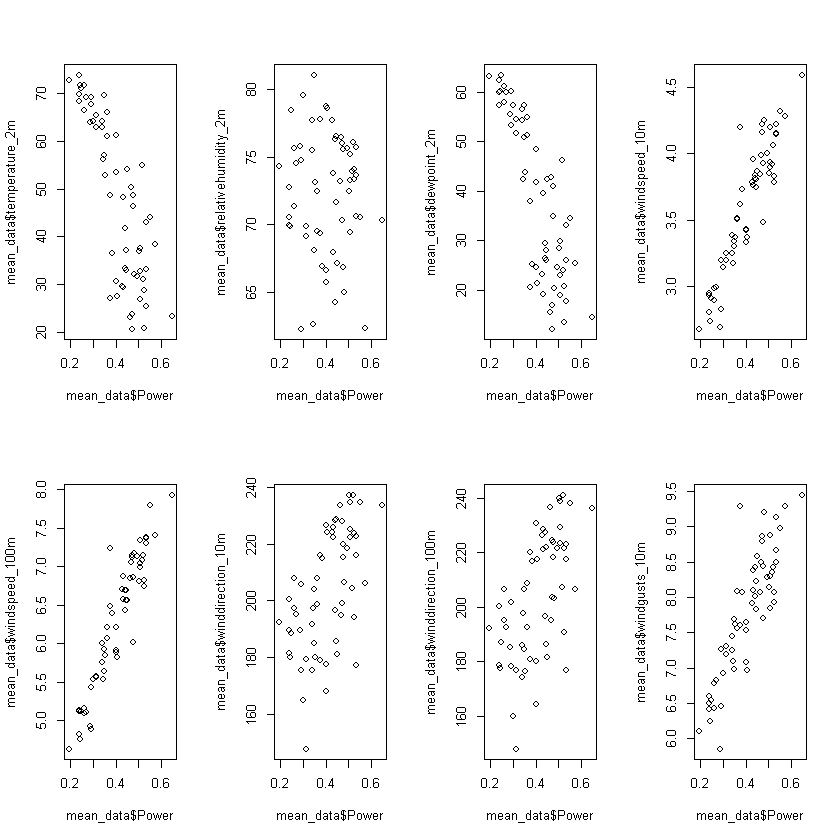

In [32]:
par(mfrow=c(2,4))
plot(mean_data$Power,mean_data$temperature_2m)
plot(mean_data$Power,mean_data$relativehumidity_2m)
plot(mean_data$Power,mean_data$dewpoint_2m)
plot(mean_data$Power,mean_data$windspeed_10m)
plot(mean_data$Power,mean_data$windspeed_100m)
plot(mean_data$Power,mean_data$winddirection_10m)
plot(mean_data$Power,mean_data$winddirection_100m)
plot(mean_data$Power,mean_data$windgusts_10m)

In the plots above we can see a possible strong correlation between Power and windspeed_10m, windspeed_100m and windgusts_10m 

In [33]:
cat('Corrlation with windspeed_10m', cor(mean_data$Power,mean_data$windspeed_10m), '\n')
cat('Corrlation with windspeed_100m', cor(mean_data$Power,mean_data$windspeed_100m), '\n')
cat('Corrlation with windgusts_10m', cor(mean_data$Power,mean_data$windgusts_10m), '\n')

Corrlation with windspeed_10m 0.9250429 
Corrlation with windspeed_100m 0.9391033 
Corrlation with windgusts_10m 0.8688792 


With correlations that strong, we can expect variables windspeed_10, _100m and windgusts_10m to be good candidates for our model

In [34]:
# Spliting data into test and train subsets
sample_month <- sample(c(TRUE, FALSE), nrow(mean_data), replace=TRUE, prob=c(0.7,0.3))
train_month  <- mean_data[sample_month, ]
test_month   <- mean_data[!sample_month, ]

In [35]:
train_month

temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
27.07056,77.80694,20.58875,3.616514,6.485722,216.0611,220.0875,7.596944,0.3765031
32.65610,69.38095,23.08780,4.199940,7.345565,225.2485,229.4018,8.878869,0.5065783
32.12406,65.00806,20.38777,4.251586,7.167527,206.7003,203.3118,9.200134,0.4812716
48.64944,69.36389,37.99875,4.196181,7.239056,178.8639,180.9778,9.289306,0.3757151
54.05067,67.09946,42.40121,3.862688,6.563495,181.1707,181.5175,8.578495,0.4497516
65.97194,69.48611,54.78125,3.508333,6.071597,208.0597,208.8708,8.085278,0.3622671
69.26573,74.76747,60.09731,2.823360,4.892392,205.7473,201.6102,6.451882,0.2913481
36.97819,72.44583,28.44236,3.853528,6.813347,237.3889,240.0819,8.144306,0.5046987
23.11855,73.17742,15.48065,3.845417,6.850188,233.8763,236.6062,8.070565,0.4614519


In [36]:
# Calculating stuff for variable selection methods
cor_month = cor(train_month)
R0_month = cor_month[1:8,ncol(cor_month)]
R_month = cor_month[1:8, 1:8]

t = qt(0.05, nrow(train_month) - 2)
r_star_month = sqrt(t^2 / (t^2 + nrow(train_month) - 2))
r_star_month

[1] 0.2455491

Information Capacity Indices Method was calculated used clearly for convince. Here we're gonna look into two other methods

In [39]:
# Graph method
R2_m = R_month
R2_m[which(abs(R2_m) <= r_star_month)] = 0
R2_m[R2_m == 0] = NA
R2_m

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m
temperature_2m,1.0000000,NA,0.9938717,-0.7653190,-0.7892727,-0.7240529,-0.7210306,-0.6221893
relativehumidity_2m,NA,1.0000000,NA,NA,NA,0.3215066,0.2951731,NA
dewpoint_2m,0.9938717,NA,1.0000000,-0.7844978,-0.7992457,-0.6993064,-0.6992916,-0.6570972
windspeed_10m,-0.7653190,NA,-0.7844978,1.0000000,0.9895871,0.5176461,0.5398298,0.9680043
windspeed_100m,-0.7892727,NA,-0.7992457,0.9895871,1.0000000,0.5625751,0.5850388,0.9347406
winddirection_10m,-0.7240529,0.3215066,-0.6993064,0.5176461,0.5625751,1.0000000,0.9920574,0.3579894
winddirection_100m,-0.7210306,0.2951731,-0.6992916,0.5398298,0.5850388,0.9920574,1.0000000,0.3853523
windgusts_10m,-0.6221893,NA,-0.6570972,0.9680043,0.9347406,0.3579894,0.3853523,1.0000000


With this method we get our first model:

$y = a_{0} + a_{1} \cdot windgusts10m + \epsilon$


With our second method there are two ways to get our model:
- By using r*
- By taking maximum from minimums from our correlations

Both methods give us the same model:

$y = a_{0} + a_{1} \cdot windspeed100m + \epsilon$

Apart from these models we've decided to test another one with both variabels:

$y = a_{0} + a_{1} \cdot windgusts10m + a_{2} \cdot windspeed100m + \epsilon$

## Time series models